# Developing Environment

In [1]:
versioninfo()

Julia Version 0.6.2
Commit d386e40c17 (2017-12-13 18:08 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Prescott)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, broadwell)


In [2]:
ENV["JULIA_CXX_RTTI"]

"1"

# Installing the Package

In [6]:
#Pkg.clone("git@manabu-xenial.local:julia/3rd-party/CxxROS.git")

INFO: Cloning CxxROS from git@manabu-xenial.local:julia/3rd-party/CxxROS.git
INFO: Computing changes...


In [3]:
@time using Cxx
#using CxxStd: StdString, StdVector

  3.947348 seconds (3.45 M allocations: 204.050 MiB, 3.31% gc time)


In [4]:
#push!(LOAD_PATH, "/home/manabu/jupyter")
@time using CxxROS

  4.311570 seconds (1.68 M allocations: 87.529 MiB, 0.63% gc time)


In [3]:
#reload("CxxROS")

# Using ROS

## ROS Messages

### Interface to "std_msgs::String"

In [5]:
msg = @cxx std_msgs::String()

(struct std_msgs::String_<class std::allocator<void> >) {
 .data = (class std::__cxx11::basic_string<char> &) {
}

}


In [6]:
typeof(msg)

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std_msgs::String_")},Tuple{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{Void}},(false, false, false)}}},(false, false, false)},32}

In [7]:
typeof(icxx"$msg;")

Cxx.CppRef{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std_msgs::String_")},Tuple{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{Void}},(false, false, false)}}},(false, false, false)}

In [8]:
msg = std_msgs.String()

(struct std_msgs::String_<class std::allocator<void> >) {
 .data = (class std::__cxx11::basic_string<char> &) {
}

}


### Conversion between from/to "String" and "CxxStd.StdString"

In [9]:
s0 = "HELO"
typeof(s0)

String

In [12]:
using CxxStd: StdString

In [13]:
s1 = StdString(s0)
typeof(s1)

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::__cxx11::basic_string")},Tuple{UInt8,Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::char_traits")},Tuple{UInt8}},(false, false, false)},Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{UInt8}},(false, false, false)}}},(false, false, false)},32}

In [14]:
s2 = std_msgs.String(s1)

(struct std_msgs::String_<class std::allocator<void> >) {
 .data = (class std::__cxx11::basic_string<char> &) {
}

}


In [15]:
typeof(icxx"$s2.data;")

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::__cxx11::basic_string")},Tuple{UInt8,Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::char_traits")},Tuple{UInt8}},(false, false, false)},Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{UInt8}},(false, false, false)}}},(false, false, false)},32}

In [16]:
icxx"$s2.data.data();", icxx"$s2.data.size();"

(Ptr{UInt8} @0x00007feec94d2e70, 0x0000000000000004)

In [17]:
StdString(s2), String(s2)

((class std::__cxx11::basic_string<char>) {
}
, "HELO")

## Interface to "std_msgs::Time"

``ros::Time`` is singleton, initialized at node handle creation

In [18]:
Type{RosTime}

Type{Cxx.CppValue{Cxx.CxxQualType{Cxx.CppBaseType{Symbol("ros::Time")},(false, false, false)},N} where N}

In [19]:
t = @cxx ros::Time()

(class ros::Time) {
}


this might cause "`Unrecognized C++ Exception (N3ros27TimeNotInitializedExceptionE)`", because ros::Time is not initialized...

In [20]:
icxx"$t.now();"

LoadError: [91mUnrecognized C++ Exception (N3ros27TimeNotInitializedExceptionE)[39m

In [21]:
time()

1.523962432879216e9

In [22]:
t = RosTime(time())

(class ros::Time) {
}


In [23]:
icxx"$t.toSec();"

1.523962433966817e9

In [24]:
icxx"$t.sec;", icxx"$t.nsec;"

(0x5ad5d241, 0x39a07486)

In [28]:
using TimeZones
ZonedDateTime(t)

2018-04-17T19:53:53+09:00

In [29]:
typeof(t) <: RosTime

true

## Building some application

In [30]:
#Libdl.dlopen(CxxROS.path_to_ros * "lib/libroscpp.so", Libdl.RTLD_GLOBAL)

In [31]:
using PyPlot

INFO: Recompiling stale cache file /home/manabu/.julia/lib/v0.6/SHA.ji for module SHA.
INFO: Recompiling stale cache file /home/manabu/.julia/lib/v0.6/BinDeps.ji for module BinDeps.
INFO: Recompiling stale cache file /home/manabu/.julia/lib/v0.6/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/manabu/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


In [32]:
@cxx ros::init(Int32(1), pointer([pointer("imu_node")]), pointer("imu_node"))

In [33]:
nh = @cxx ros::NodeHandle()

(class ros::NodeHandle) {
}


In [34]:
Libdl.dlopen(CxxROS.path_to_ros * "lib/libtopic_tools.so", Libdl.RTLD_GLOBAL)

Ptr{Void} @0x000000000f2c12c0

In [35]:
three_sec = @cxx ros::Duration(3.0)

(class ros::Duration) {
}


In [36]:
msgp = icxx"""ros::topic::waitForMessage<sensor_msgs::Imu>("/imu/data_raw", $nh, $three_sec);"""
msg = icxx"*$msgp;"

(struct sensor_msgs::Imu_<class std::allocator<void> > &) {
 .header = (struct std_msgs::Header_<class std::allocator<void> > &) {
 .seq = (unsigned int &) 81092
 .stamp = (class ros::Time &) {
}

 .frame_id = (class std::__cxx11::basic_string<char> &) {
}

}

 .orientation = (struct geometry_msgs::Quaternion_<class std::allocator<void> > &) {
 .x = (double &) -0.00046864082105457783
 .y = (double &) -0.0010023099603131413
 .z = (double &) -0.8329387307167053
 .w = (double &) 0.553364098072052
}

 .orientation_covariance = (class boost::array<double, 9> &) {
 .elems = Array<Float64,1>

}

 .angular_velocity = (struct geometry_msgs::Vector3_<class std::allocator<void> > &) {
 .x = (double &) -0.0011078380048274994
 .y = (double &) 0.0005311267450451851
 .z = (double &) -0.001274146605283022
}

 .angular_velocity_covariance = (class boost::array<double, 9> &) {
 .elems = Array<Float64,1>

}

 .linear_acceleration = (struct geometry_msgs::Vector3_<class std::allocator<void> > &) {
 .x = (

In [37]:
typeof(icxx"$msg.header.stamp;")

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppBaseType{Symbol("ros::Time")},(false, false, false)},8}

In [38]:
t = icxx"(ros::Time&) $msg.header.stamp;"

(class ros::Time &) {
}


In [40]:
typeof(t) <:RosTimeR

true

In [41]:
Int64(trunc(@cxx t->toSec()))

1523962590

In [42]:
icxx"$msg.header.stamp.toSec();"

1.5239625902156405e9

In [43]:
typeof(icxx"$msg.angular_velocity;")

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("geometry_msgs::Vector3_")},Tuple{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{Void}},(false, false, false)}}},(false, false, false)},24}

In [44]:
DenseArray(icxx"(geometry_msgs::Vector3&) $msg.angular_velocity;")

3-element CxxStd.WrappedCppPrimArray{Float64}:
 -0.00110784 
  0.000531127
 -0.00127415 

In [45]:
typeof(icxx"$msg.linear_acceleration;")

Cxx.CppValue{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("geometry_msgs::Vector3_")},Tuple{Cxx.CxxQualType{Cxx.CppTemplate{Cxx.CppBaseType{Symbol("std::allocator")},Tuple{Void}},(false, false, false)}}},(false, false, false)},24}

In [46]:
av = icxx"(geometry_msgs::Vector3&) $msg.linear_acceleration;"

(struct geometry_msgs::Vector3_<class std::allocator<void> > &) {
 .x = (double &) 0.0014758703764528036
 .y = (double &) 0.0007445100345648825
 .z = (double &) 0.9797696471214294
}


In [47]:
using OffsetArrays

In [48]:
buf = OffsetArray(Float64, (1:1000)-999, 1:7);
fill!(buf, Float64(NaN));

In [49]:
function cb_scan(msg)
    global buf
    p = @cxx sensor_msgs::Imu::ConstPtr()
    icxx"$p = $msg;" # required to select this julia function from Cxx
    
    imu_msg = icxx"*($p);" # boost::share_pointer get()
    
    # circular shift at 1st-index of OffsetArray, to store latest value at index:0
    idx1 = indices(buf)[1]
    last(idx1) == 0 ? idx1 += 999 : idx1 -= 1
    buf = OffsetArray(parent(buf), idx1, indices(buf)[2])

    v = @view buf[0,:] # view at 0 of (-999:0)
    #v[1]   = icxx"$imu_msg.header.stamp.sec;" + icxx"$imu_msg.header.stamp.nsec;" / 1000000000.
    #v[2:4] = Float64[icxx"$imu_msg.angular_velocity.x;"    icxx"$imu_msg.angular_velocity.y;"    icxx"$imu_msg.angular_velocity.z;"   ]
    #v[5:7] = Float64[icxx"$imu_msg.linear_acceleration.x;" icxx"$imu_msg.linear_acceleration.y;" icxx"$imu_msg.linear_acceleration.z;"]
    v[1]   = icxx"$imu_msg.header.stamp.toSec();"
    v[2:4] = DenseArray(icxx"(geometry_msgs::Vector3&) $imu_msg.angular_velocity;")
    v[5:7] = DenseArray(icxx"(geometry_msgs::Vector3&) $imu_msg.linear_acceleration;")
    nothing
end

cb_scan (generic function with 1 method)

In [50]:
function subscribe()
    icxx"""
      //std::function<void (sensor_msgs::Imu::ConstPtr)> cb = [&](sensor_msgs::Imu::ConstPtr msg) {
      boost::function<void (sensor_msgs::Imu::ConstPtr)> cb = [&](sensor_msgs::Imu::ConstPtr msg) {
        $:(cb_scan(icxx"return msg;"));
      };
      return $nh.subscribe<sensor_msgs::Imu::ConstPtr>("/imu/data_raw", 100, cb);
    """
end

subscribe (generic function with 1 method)

### subscribe

In [51]:
subscriber = subscribe()

(class ros::Subscriber) {
}


In [52]:
spin = RosSpin(160)

CxxROS.RosSpin(false, nothing, (class ros::Rate) {
}
)

In [53]:
start(spin)

Task (runnable) @0x00007feec8830010

In [54]:
istaskdone(spin.task)

false

In [55]:
current_task()

Task (runnable) @0x00007feedd76b1f0

In [56]:
spin.task

Task (runnable) @0x00007feec8830010

### unsubscribe

In [72]:
# stop(spin)
@async Base.throwto(spin.task, ErrorException("stop"))

got exception: stop

Task (runnable) @0x00007feec8812770

In [73]:
istaskdone(spin.task)

true

In [74]:
@cxx subscriber->shutdown()

### graphize

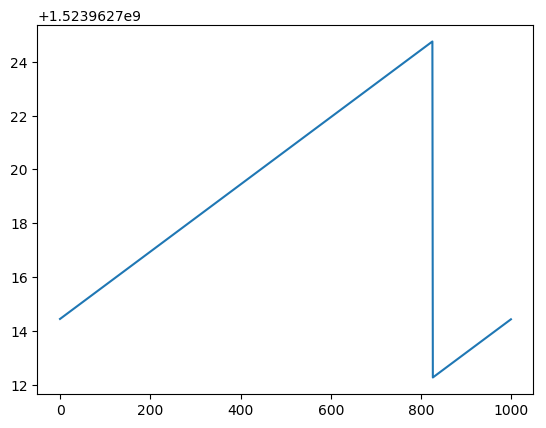

(PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7fee9e54db38>], -825:174)

In [60]:
p = plot(parent(buf)[:,1]), indices(buf)[1]

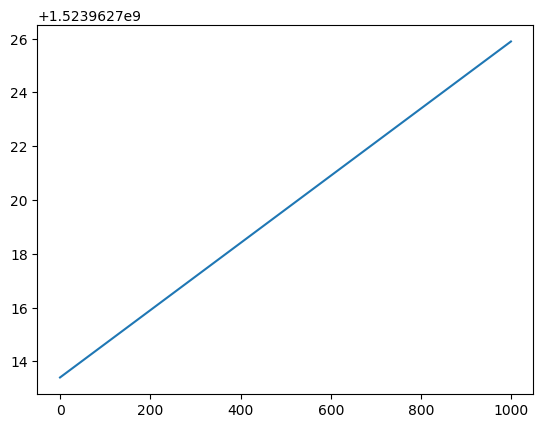

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee9e52b860>

In [61]:
p = plot(circshift(parent(buf)[:,1], last(indices(buf)[1]) ))

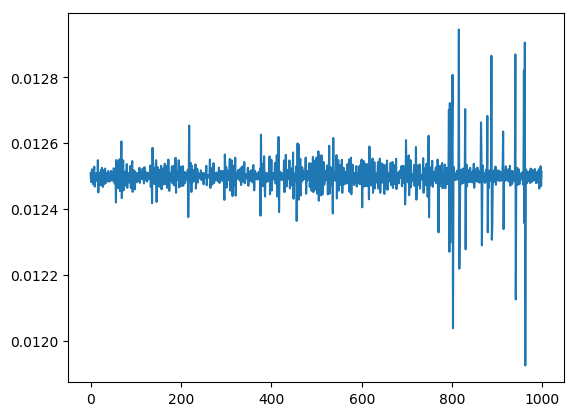

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee9e48c3c8>

In [62]:
p = plot(diff(circshift(parent(buf)[:,1], last(indices(buf)[1]) )))

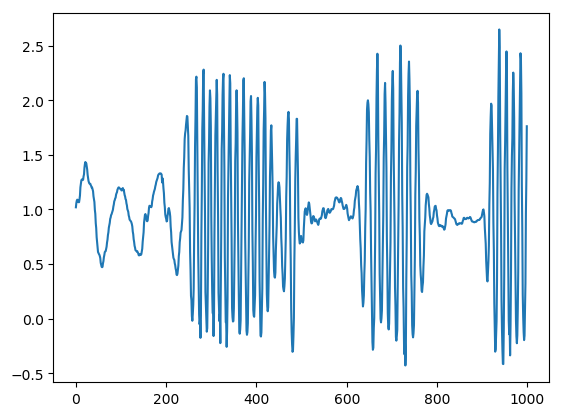

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee9e408048>

In [66]:
# 7th: linear_acceleration.z
p = plot(circshift(parent(buf)[:,7], last(indices(buf)[1])) )

In [67]:
# latest values
@time @view buf[7,:]

  0.000089 seconds (21 allocations: 640 bytes)


SubArray{Float64,1,OffsetArrays.OffsetArray{Float64,2,Array{Float64,2}},Tuple{Int64,Base.Slice{UnitRange{Int64}}},true} with indices 1:7:
  1.52396e9
 -0.0380344
 -0.338475 
 -0.204334 
 -0.20907  
 -0.0788111
  0.334757 

In [68]:
# the before of latest balues
@time circshift(parent(buf), last(indices(buf)[1]))[end-1,:]

  0.165802 seconds (75.19 k allocations: 3.855 MiB)


7-element Array{Float64,1}:
  1.52396e9  
 -0.00339041 
  6.17104e-5 
 -0.000324596
  0.00270576 
  0.00148902 
  0.977586   

In [69]:
# first values
@time circshift(parent(buf), last(indices(buf)[1]))[1,:]

  0.000041 seconds (11 allocations: 55.172 KiB)


7-element Array{Float64,1}:
  1.52396e9
 -0.767305 
 -0.797779 
 -0.0018232
 -0.0152498
  0.155106 
  1.0067   

In [70]:
t = circshift(parent(buf), last(indices(buf)[1]))[:,1]
t[end] - t[1], endof(t), size(t), mean(diff(t)) * (size(t)[1] - 1)

(12.487500429153442, 1000, (1000,), 12.487500429153442)

In [71]:
x = circshift(parent(buf), last(indices(buf)[1]))[:,2:7]
mean(x, 1)

1×6 Array{Float64,2}:
 -0.000462234  -0.00024776  0.00029634  0.000120839  0.00118441  0.978607